# Example 9 Analysis

We will plot the absorption rate as a function of mass, and compare to the results of Example 7.

## Packages

In [1]:
import numpy as np

# some personal preferences for nice plots
%run "../../utilities/output_parser/plotter.ipynb"

# helpful functions for processing output
import sys
sys.path.append("../../utilities/output_parser")
import EXDMDataHandler
from EXDMDataHandler import EXDMData

## Data

In [2]:
data = EXDMData(filename = './output/EXDM_out_example_9.hdf5')

## Results

### Absorption Rate

#### Data

In [3]:
[ masses_eV, abs_rates_1 ] = data.get_absorption_rates(g2 = 10**(-26), 
                                                    width = [0.2, 0.1, 1000])

[ masses_eV, abs_rates_2 ] = data.get_absorption_rates(g2 = 10**(-26), 
                                                    width = [1, 1, 1])

#### Plot

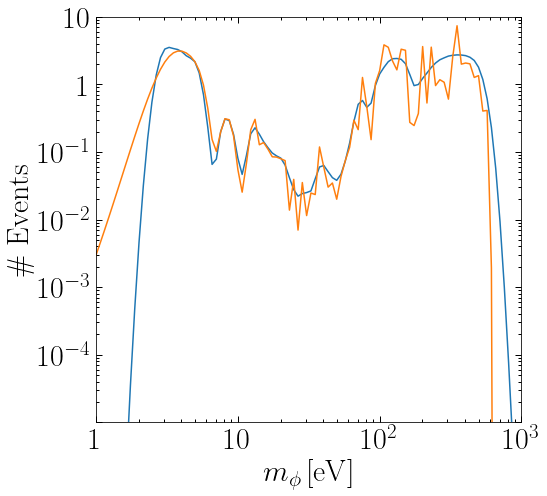

In [4]:
save_fig = True

fig, axes = plt.subplots(nrows=1, ncols=1, 
                             figsize=(7*1.1, 7))

log_mX_min = 0
log_mX_max = 3

log_events_min = -5
log_events_max = 1

set_custom_tick_options(axes)
set_custom_axes(axes, 'x', log_mX_min, log_mX_max,
               ax_type = 'log', 
               label = r'$m_\phi \, [\mathrm{eV}]$')
set_custom_axes(axes, 'y', log_events_min, log_events_max,
               ax_type = 'log', 
               label = r'$\# \ \mathrm{Events}$', 
               show_first = False)

axes.plot(
    np.log10(masses_eV), 
    np.log10(abs_rates_1),
)

axes.plot(
    np.log10(masses_eV), 
    np.log10(abs_rates_2),
)

fig.tight_layout()
    
if save_fig:
    plt.savefig('./output/Si_absorption_rate_cf.pdf', 
                bbox_inches='tight', pad_inches = 0.075)

plt.show()

### Absorption Rate (comparison with Example 7)

#### Data

In [5]:
data_ex7 = EXDMData(filename = '../7/output/EXDM_out_example_7.hdf5')

[ masses_eV_ex7, abs_rates_ex7_1 ] = data_ex7.get_absorption_rates(g2 = 10**(-26), 
                                                                width = [0.2, 0.1, 1000])

[ masses_eV_ex7, abs_rates_ex7_2 ] = data_ex7.get_absorption_rates(g2 = 10**(-26), 
                                                                width = [1, 1, 1])

#### Plot

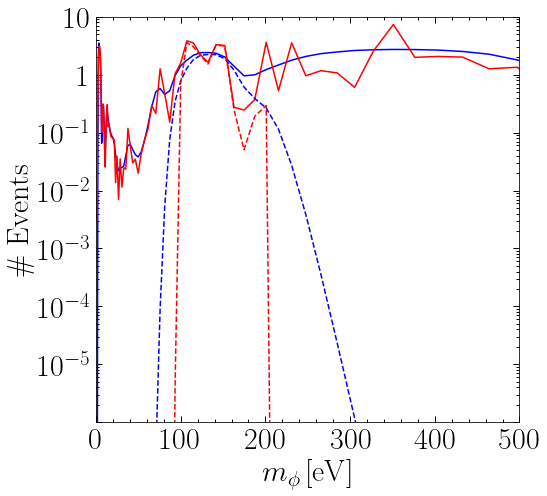

In [6]:
save_fig = True

fig, axes = plt.subplots(nrows=1, ncols=1, 
                             figsize=(7*1.1, 7))

mX_min = 0
mX_max = 500

log_events_min = -6
log_events_max = 1

set_custom_tick_options(axes)
set_custom_axes(axes, 'x', mX_min, mX_max,
               ax_type = 'lin', 
               label = r'$m_\phi \, [\mathrm{eV}]$',
               step = 100)
set_custom_axes(axes, 'y', log_events_min, log_events_max,
               ax_type = 'log', 
               label = r'$\# \ \mathrm{Events}$', 
               show_first = False)

axes.plot(
    masses_eV, 
    np.log10(abs_rates_1),
    color = 'blue'
)

axes.plot(
    masses_eV, 
    np.log10(abs_rates_2),
    color = 'red'
)

axes.plot(
    masses_eV_ex7, 
    np.log10(abs_rates_ex7_1),
    color = 'blue',
    linestyle = '--'
)

axes.plot(
    masses_eV_ex7, 
    np.log10(abs_rates_ex7_2),
    color = 'red',
    linestyle = '--'
)

fig.tight_layout()
    
if save_fig:
    plt.savefig('./output/Si_absorption_rate_cc_cf_compare.pdf', 
                bbox_inches='tight', pad_inches = 0.075)

plt.show()